# Random forest

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("../Data/Heart.csv", index_col=0)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


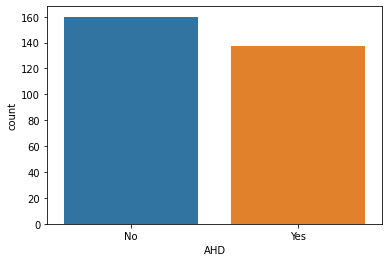

In [6]:
df.dropna(inplace=True)

sns.countplot(data = df, x = "AHD");

In [13]:
from sklearn.model_selection import train_test_split

df_dummies = pd.get_dummies(df, drop_first=True)
X, y = df_dummies.drop("AHD_Yes", axis = 1), df_dummies["AHD_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((237, 16), (60, 16))

## Random forest classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=uint8)

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 150, 200, 300],
    "criterion": ["gini", "entropy"],
    "max_features": ["auto", "sqrt", "log2"],
}

clf = GridSearchCV(
    RandomForestClassifier(), param_grid=param_grid, cv=4, verbose=1, scoring="recall"
)

clf.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='recall', verbose=1)

In [18]:
clf.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 300}

## Evaluation

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



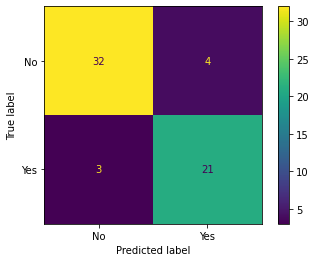

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_tuned = clf.predict(X_test)

print(classification_report(y_test, y_pred_tuned))
cm = confusion_matrix(y_test, y_pred_tuned)
ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"]).plot()

# recall = TP/(TP+FN)

In [22]:
model_rf.feature_importances_, model_rf.feature_importances_.sum()

(array([0.08839598, 0.03404896, 0.08362822, 0.09486928, 0.01300379,
        0.02115667, 0.12223509, 0.05525256, 0.11696637, 0.03096116,
        0.14055381, 0.03680003, 0.00910466, 0.01581684, 0.07399679,
        0.06320981]),
 0.9999999999999999)

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

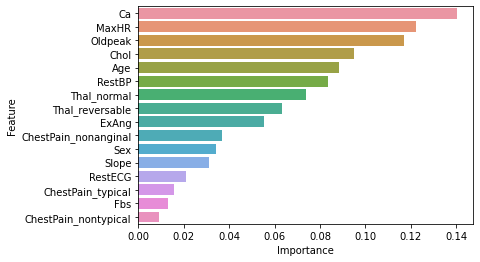

In [30]:
feature_importance = pd.DataFrame([X.columns, model_rf.feature_importances_]).T
feature_importance.columns = ["Feature", "Importance"]
feature_importance.sort_values(by = "Importance", ascending = False, inplace = True)
sns.barplot(data = feature_importance, y = "Feature", x = "Importance")